# ***Heart Attack Analysis & Prediction Dataset***

# ***CRISP-DM CYCLE "Cross-Industry Standard Process for Data Mining"***

## ***1. Business Understanding***

**Business Understanding for Heart Attack Analysis & Prediction Dataset**

$$$$


**Overview:**
The Heart Attack Analysis & Prediction Dataset provides detailed information on various factors related to heart health, including demographic data and clinical indicators. It consists of 303 instances and 14 features.


**Objective:**
The primary goal of this project is to develop a logistic regression model to predict the likelihood of an individual experiencing a heart attack based on their health attributes and clinical characteristics.


**What to Predict:**
We aim to predict the probability of an individual having a heart attack, represented by a binary outcome: 0 indicating less chance of a heart attack and 1 indicating a higher chance of a heart attack. This prediction will rely on features such as age, sex, exercise-induced angina (exang), number of major vessels (ca), chest pain type (cp), resting blood pressure (trtbps), cholesterol levels (chol), fasting blood sugar (fbs), resting electrocardiographic results (rest_ecg), and maximum heart rate achieved (thalach).

$$$$

**Decisions Enabled by the Model:**
1. **Risk Assessment**: Healthcare professionals can utilize the model to assess an individual's risk of experiencing a heart attack, guiding personalized risk management strategies and interventions.
2. **Early Intervention**: Identification of high-risk individuals enables timely interventions such as lifestyle modifications, medication, and cardiac monitoring to prevent adverse cardiac events.
3. **Treatment Planning**: The model assists in tailoring treatment plans, optimizing medication regimens, and recommending appropriate interventions based on an individual's risk profile.
4. **Resource Allocation**: Hospitals and healthcare institutions can allocate resources efficiently by prioritizing high-risk patients for diagnostic tests, consultations, and specialized cardiac care.
5. **Public Health Initiatives**: Insights from the model can inform public health initiatives aimed at promoting cardiovascular health, raising awareness about modifiable risk factors, and implementing preventive measures at the community level.

**Project Success Criteria:**
- Achieving a model accuracy of at least 80% in predicting the likelihood of heart attacks.
- Validating the model's performance through cross-validation and comparing it with existing clinical risk assessment tools.
- Demonstrating the model's practical utility by implementing it in a healthcare setting and evaluating its impact on patient outcomes.

**Risks and Assumptions:**
- **Data Quality**: Ensuring the quality and reliability of the input data, including addressing missing values, outliers, and inconsistencies.
- **Model Generalization**: Ensuring that the model generalizes well to new, unseen data and is not overly sensitive to variations in the training dataset.
- **Ethical Considerations**: Addressing potential biases in the data and model predictions, especially concerning sensitive attributes such as age, sex, and race.
- **Regulatory Compliance**: Ensuring compliance with data privacy regulations and ethical guidelines governing the use of patient health data.

**Importance of Predictive Skill:**
Accurate prediction of heart attack risk is crucial for improving patient outcomes, reducing healthcare costs, and addressing the significant burden of cardiovascular disease. By leveraging predictive analytics, healthcare providers can intervene proactively, minimize complications, and enhance patient care for individuals at risk of heart attacks.

Understanding the significance of predicting heart attacks and the potential decisions facilitated by accurate predictions allows us to leverage the Heart Attack Analysis & Prediction Dataset effectively, contributing to advancements in cardiovascular health management and patient care.

**Project Plan:**
1. **Data Collection and Exploration**: Gather the Heart Attack Analysis & Prediction Dataset, perform exploratory data analysis, and preprocess the data to prepare it for modeling.
2. **Model Development**: Develop and train logistic regression models using appropriate feature engineering techniques and hyperparameter tuning.
3. **Model Evaluation**: Evaluate model performance using relevant metrics such as accuracy, precision, recall, and area under the ROC curve.
4. **Validation and Interpretation**: Validate the model's performance using cross-validation and interpret the results to understand the factors contributing to heart attack risk.
5. **Implementation and Deployment**: Implement the finalized model in a healthcare setting, deploy it into production, and monitor its performance in real-world scenarios.
6. **Documentation and Reporting**: Document the project methodology, findings, and recommendations in a comprehensive report, and communicate the results to stakeholders in the healthcare domain.

## ***2. Data Understanding***


### ***2.1. Data collection***

In this phase, I gather initial data, describe its properties, explore the data, and verify its quality. It includes activities such as data collection, data description, data exploration, and data quality assessment.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn import *
import seaborn as sns
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Analitica II/Bases de Datos/heart.csv')

### ***2.2. Data Description***

The Heart Attack Analysis & Prediction Dataset comprises 303 instances and 14 features, each representing various health parameters and risk factors associated with heart attacks. Below is a detailed description of each feature in the dataset:

* **Data Description**:
   - **Objective**: Describe the data to understand its structure and content.
   - **Activities**:
     - List and describe each feature (column) in the dataset.
     - Determine the data types (e.g., numeric, categorical) of each feature.
     - Summarize the dataset (e.g., number of instances, number of features).

In [ ]:
# Basic Information about the DataFrame:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


   - Describe each feature:
     - Age: Age of the patient (numeric).
     - Sex: Sex of the patient (0 = female, 1 = male) (categorical).
     - exang: Exercise induced angina (0 = no, 1 = yes) (categorical).
     - ca: Number of major vessels (0-3) (numeric).
     - cp: Chest pain type (1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic) (categorical).
     - trtbps: Resting blood pressure (in mm Hg) (numeric).
     - chol: Cholesterol levels (in mg/dl) (numeric).
     - fbs: Fasting blood sugar > 120 mg/dl (0 = false, 1 = true) (categorical).
     - rest_ecg: Resting electrocardiographic results (0 = normal, 1 = ST-T wave abnormality, 2 = left ventricular hypertrophy) (categorical).
     - thalach: Maximum heart rate achieved (numeric).
     - target: Likelihood of a heart attack (0 = less chance, 1 = more chance) (categorical).

In [ ]:
# Summary Statistics for Numeric Features:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


By carefully considering these aspects during the model development process, we can construct a logistic regression model that effectively predicts the likelihood of a heart attack based on the provided dataset, providing valuable insights for medical practitioners and healthcare decision-makers.

The most important aspects to form that I use the data to make the model is first makeing an feature selection, we need to identify features most strongly associated with the likelihood of a heart attack by analyzing correlations and domain knowledge. Age, sex, chest pain, resting blood pressure, angina, and cholesterol levels are likely significant predictors. So that is how we planed to use those characteristics to make a good model to predict heart attack

### ***2.3. Data Exploration***




* **Data Exploration**:
   - **Objective**: Explore the data to uncover initial insights and identify potential issues.
   - **Activities**:
     - Perform exploratory data analysis (EDA) using statistical summaries and visualizations.
     - Calculate descriptive statistics (mean, median, standard deviation, etc.) for numeric features.
     - Create visualizations such as histograms, box plots, scatter plots, and correlation matrices.
     - Examine the distribution of each feature and identify patterns, trends, and anomalies.

   - Perform EDA:
     - Calculate descriptive statistics for numeric features (e.g., age, trtbps, chol, thalach).
     - Create histograms for numeric features to visualize their distributions.
     - Use box plots to identify potential outliers in numeric features.
     - Generate scatter plots to examine relationships between pairs of numeric features.
     - Create a correlation matrix to understand the relationships between features.


* First I'm going to visualize the first 40 data of the table

In [ ]:
df.head(40)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


* Second I'm going to visualize the distribution of some variables in a scatter plot

<Axes: xlabel='trtbps', ylabel='chol'>

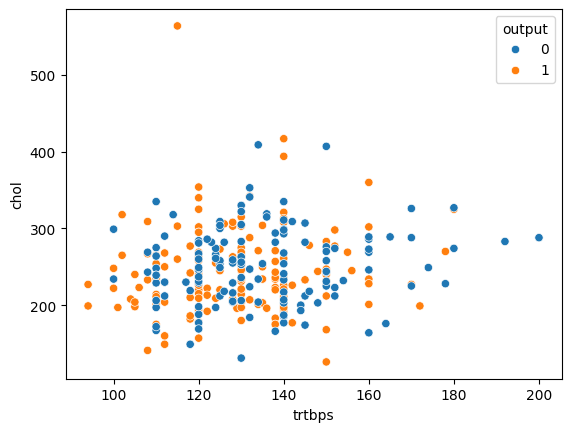

In [ ]:
#### @title trtbps vs Cholesterol

sns.scatterplot(x=df.trtbps, y= df.chol, hue=df.output)

<Axes: xlabel='age', ylabel='chol'>

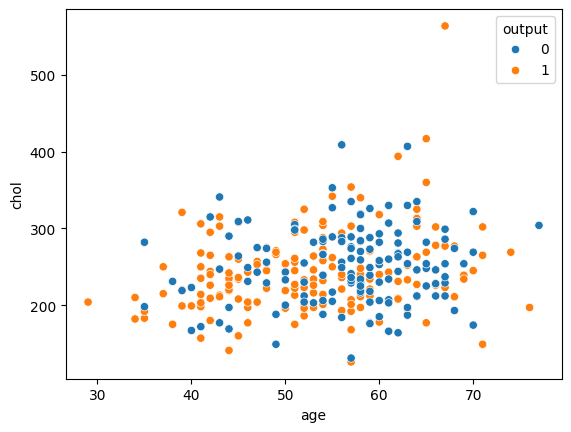

In [ ]:
#### @title Cholesterol vs Age
sns.scatterplot(x=df.age, y= df.chol, hue=df.output)

* Third I'm going to find the feature distributions

<ipython-input-136-8cccdea8db3d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='Set2')


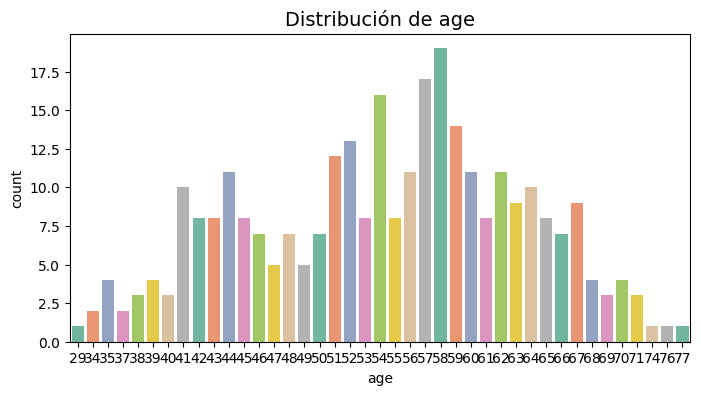

<ipython-input-136-8cccdea8db3d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='Set2')


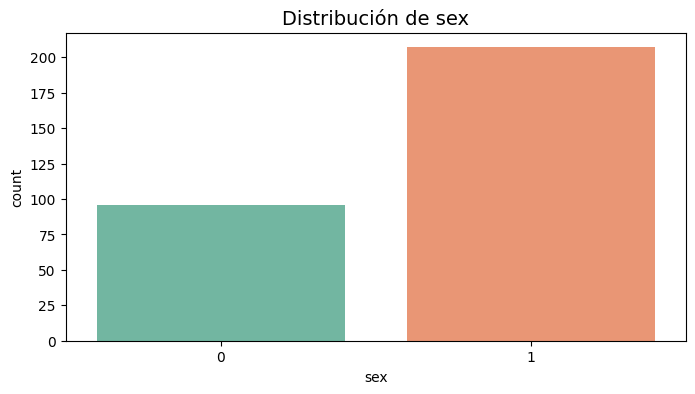

<ipython-input-136-8cccdea8db3d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='Set2')


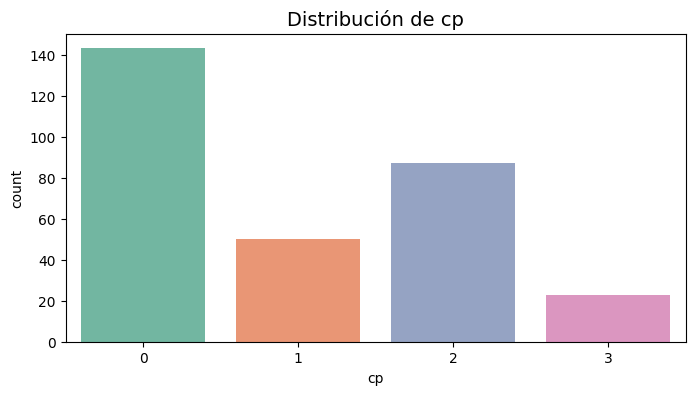

<ipython-input-136-8cccdea8db3d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='Set2')


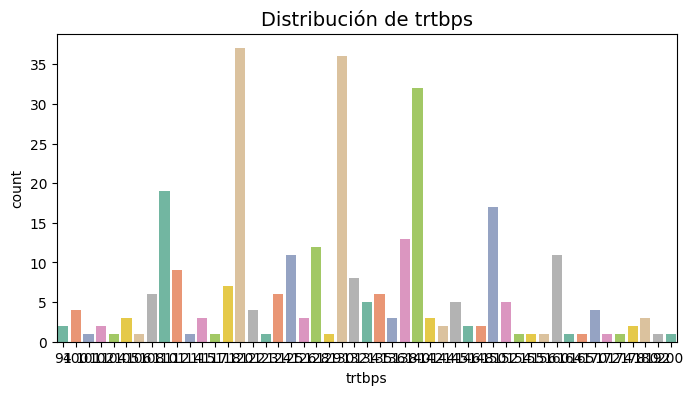

<ipython-input-136-8cccdea8db3d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='Set2')


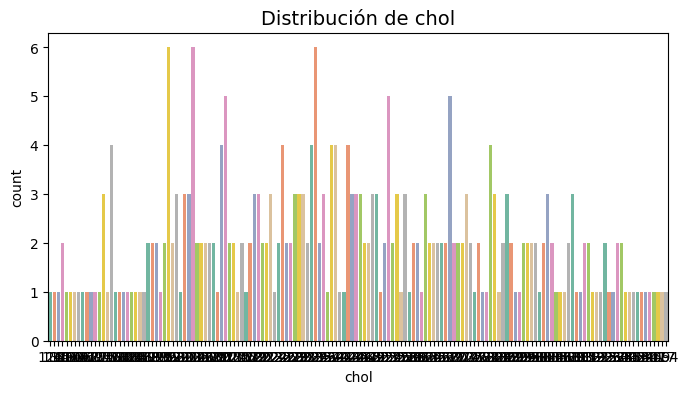

<ipython-input-136-8cccdea8db3d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='Set2')


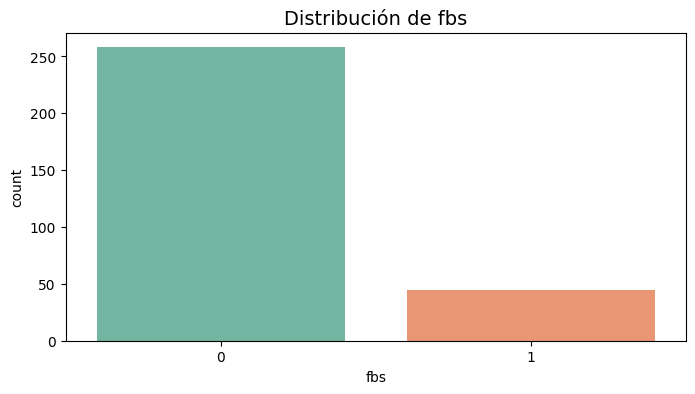

<ipython-input-136-8cccdea8db3d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='Set2')


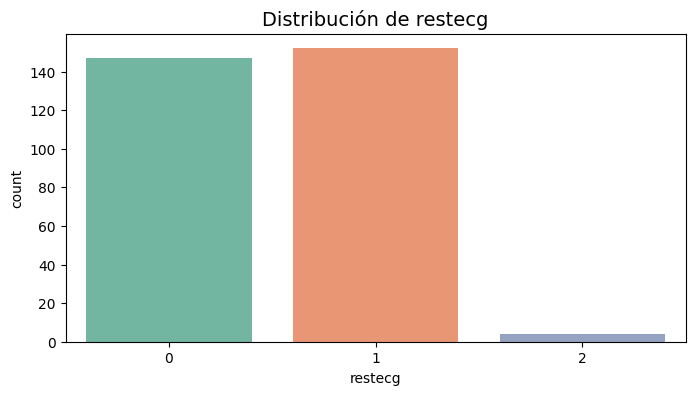

<ipython-input-136-8cccdea8db3d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='Set2')


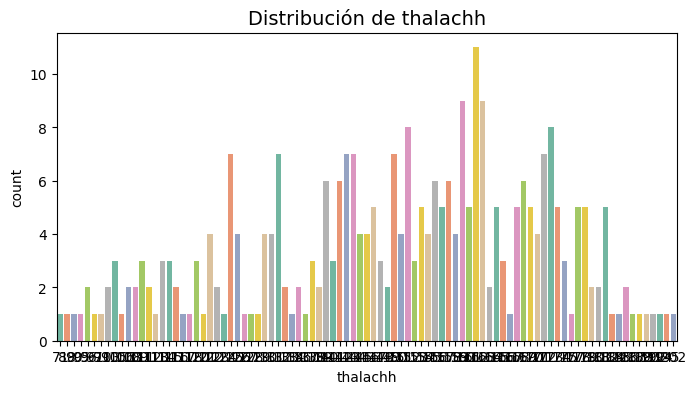

<ipython-input-136-8cccdea8db3d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='Set2')


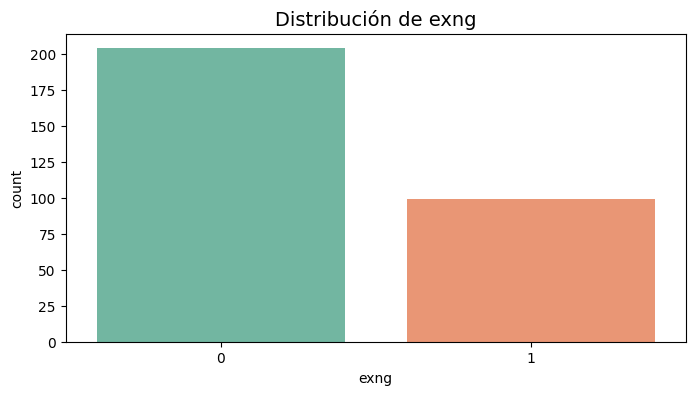

<ipython-input-136-8cccdea8db3d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='Set2')


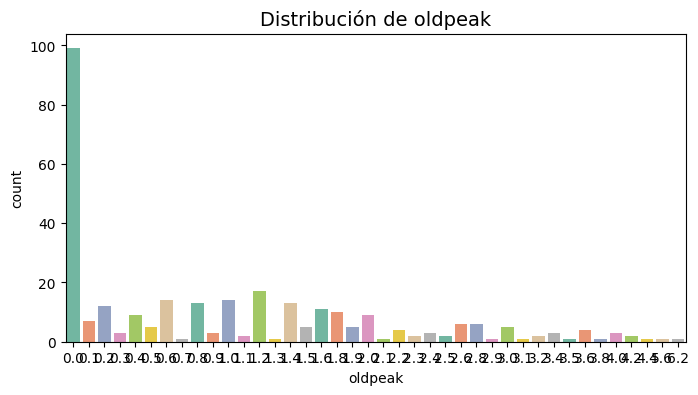

<ipython-input-136-8cccdea8db3d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='Set2')


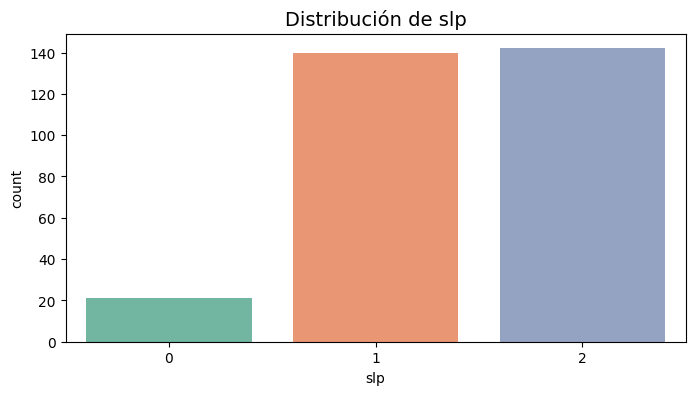

<ipython-input-136-8cccdea8db3d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='Set2')


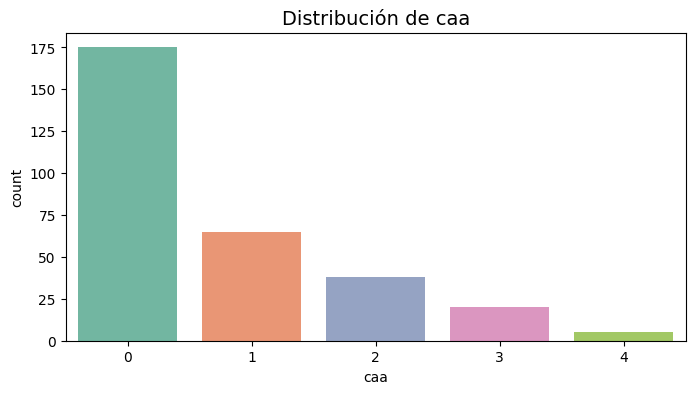

<ipython-input-136-8cccdea8db3d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='Set2')


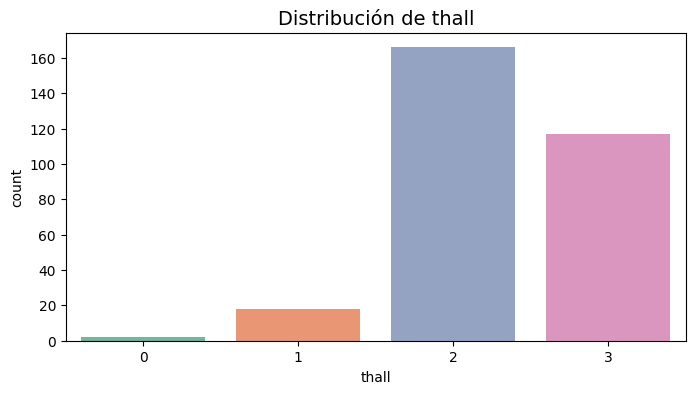

<ipython-input-136-8cccdea8db3d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='Set2')


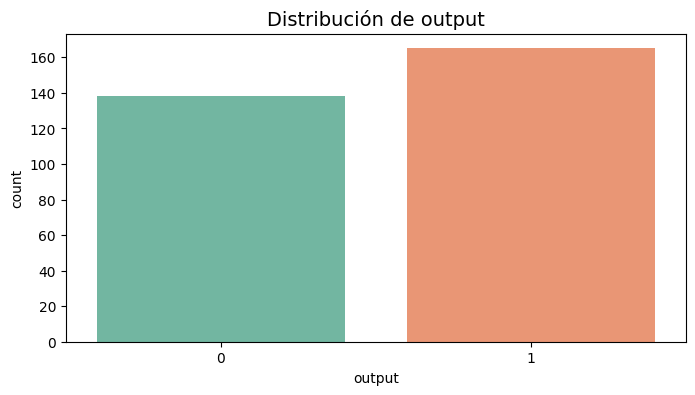

In [ ]:
categorical_features = df.columns

for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=feature, palette='Set2')
    plt.title(f'Distribución de {feature}', size=14)
    plt.show()


* Plot the dependent variable. We´ll use seaborn for that.

<ipython-input-137-4f576a46e642>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x= df["output"], palette= colors)


[Text(0, 0, '138')]

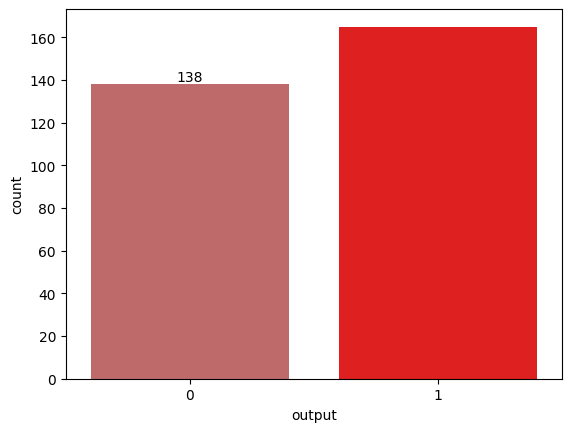

In [ ]:
colors= ["#CD5C5C","#FF0000"]
ax = sns.countplot(x= df["output"], palette= colors)
ax.bar_label(ax.containers[0])

We can observe that the prediction variable has a reasonable distribution output, then we could predict the dependent variable

* Correlation Matrix

<Axes: >

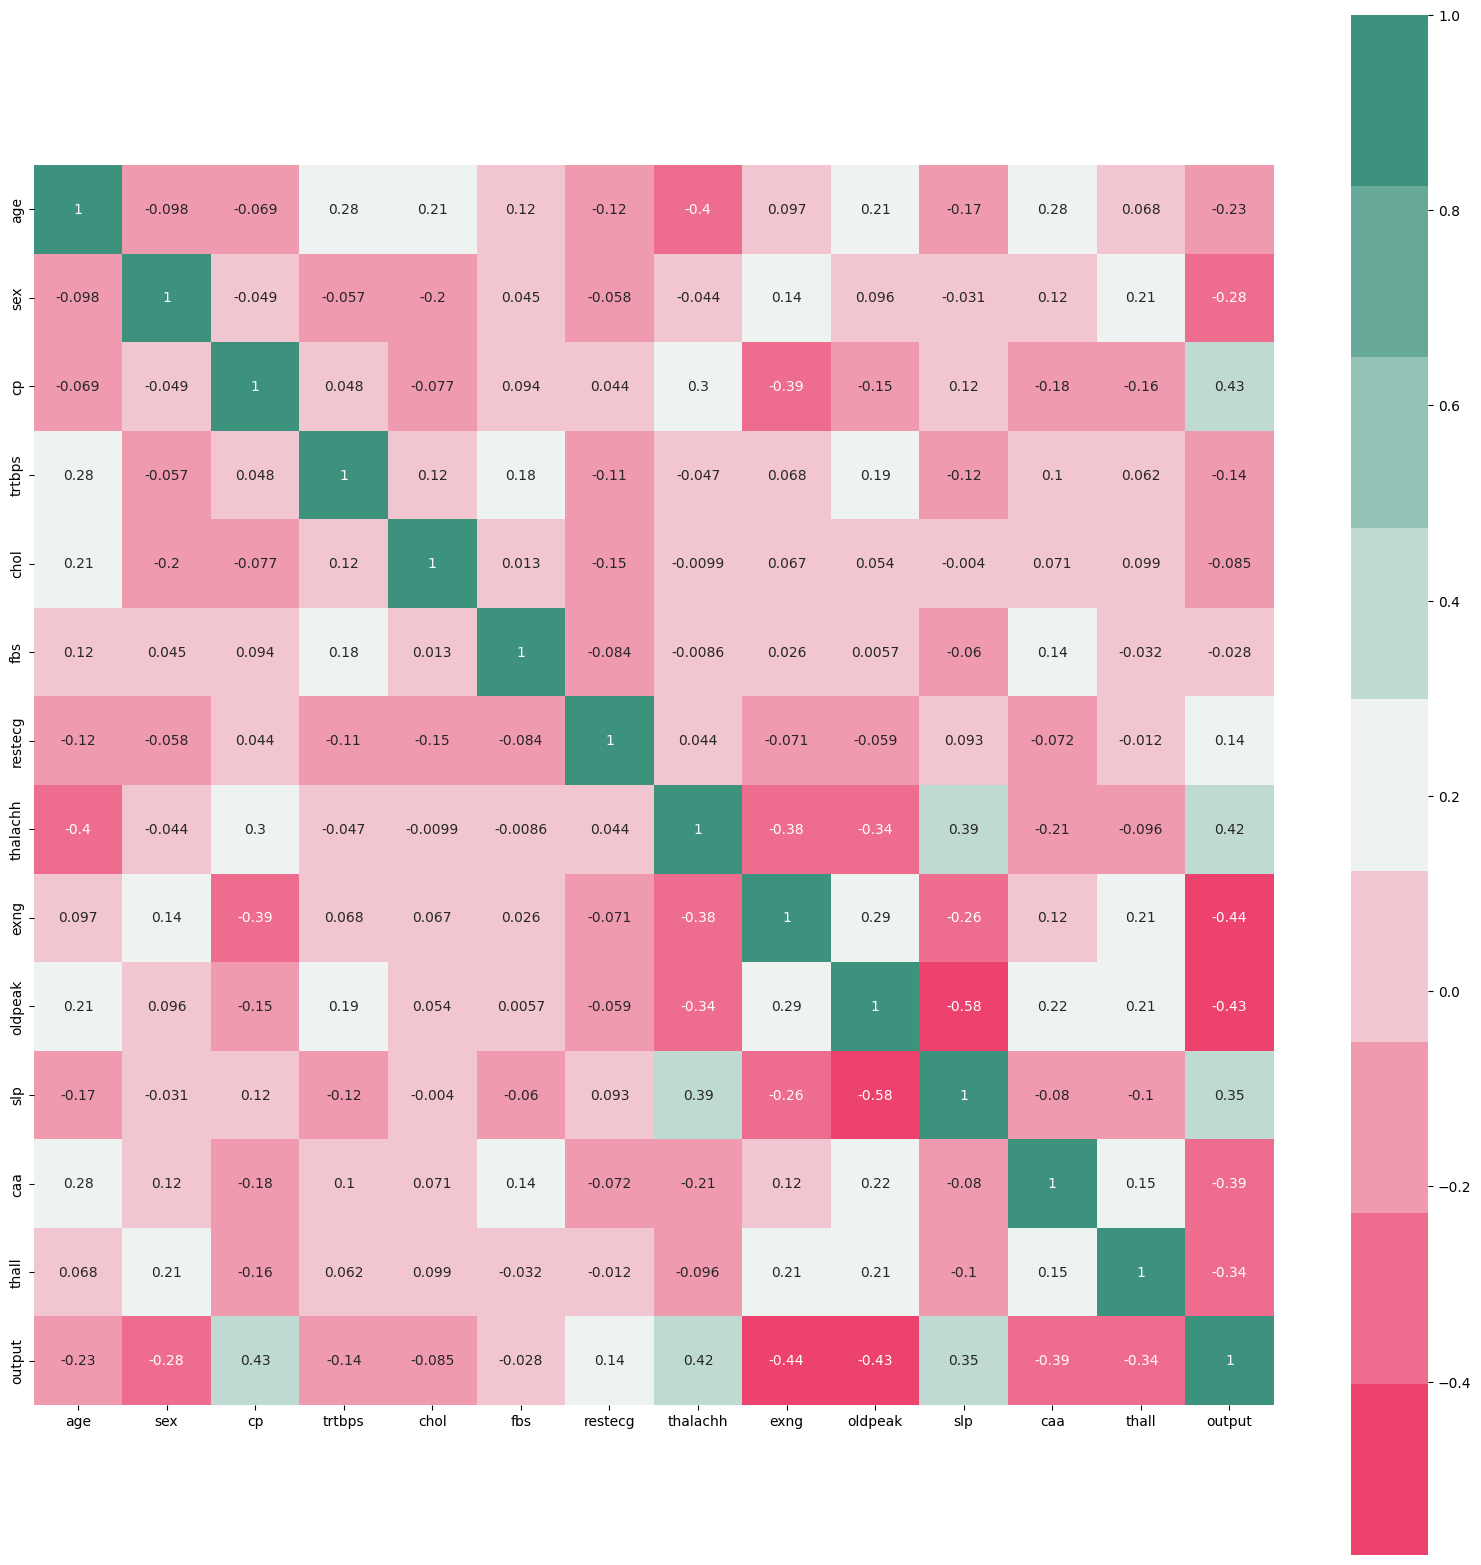

In [ ]:
# Correlation matrix to understand relationships between features

cmap = sns.diverging_palette(2, 165, s=80, l=55, n=9)
corrmat = df.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True)

In this step we can observe the correlation between independent variables or "x" columns with the dependent variable or "y" output column

### ***2.4 Datta quality verification***

   - **Objective**: Assess the quality of the data and address any issues.
   - **Activities**:
     - Identify missing values and decide on strategies to handle them (e.g., imputation, removal).
     - Detect and handle outliers that may affect model performance.
     - Check for inconsistencies and errors in the data (e.g., incorrect data types, duplicated records).
     - Evaluate the overall reliability and completeness of the dataset.

In [ ]:
# Checking for Missing Values:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

We can observe that there is no null data in the dataframe, so we can continuous with the next step.

## ***3. Data preparation***

### ***3.1. Feature transformation***


Transform features to improve model performance. Whether transforming categorical variables into dummies and the normalization or standardization of numerical features-

In this case, it is advisable to standardize and create dummy variables before applying Lasso regression as a step prior to logistic regression.

* Transform features to dummies

In [ ]:
import pandas as pd

def convert_to_dummies(df, columns):
    for column in columns:
        dummies = pd.get_dummies(df[column], prefix=column, drop_first=True)
        df = pd.concat([df, dummies], axis=1)
        df.drop(column, axis=1, inplace=True)
    return df

categorical_columns = ['cp', 'caa', 'slp', 'thall']

df_dummified = convert_to_dummies(df, categorical_columns)

In [ ]:
for column in df_dummified.columns:
    if df_dummified[column].dtype == 'bool':
        df_dummified[column] = df_dummified[column].astype(int)

In [ ]:
df_dummified

,age,sex,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,output,...,cp_3,caa_1,caa_2,caa_3,caa_4,slp_1,slp_2,thall_1,thall_2,thall_3
0,63,1,145,233,1,0,150,0,2.3,1,...,1,0,0,0,0,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,1,...,0,0,0,0,0,0,0,0,1,0
2,41,0,130,204,0,0,172,0,1.4,1,...,0,0,0,0,0,0,1,0,1,0
3,56,1,120,236,0,1,178,0,0.8,1,...,0,0,0,0,0,0,1,0,1,0
4,57,0,120,354,0,1,163,1,0.6,1,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,1,123,1,0.2,0,...,0,0,0,0,0,1,0,0,0,1
299,45,1,110,264,0,1,132,0,1.2,0,...,1,0,0,0,0,1,0,0,0,1
300,68,1,144,193,1,1,141,0,3.4,0,...,0,0,1,0,0,1,0,0,0,1
301,57,1,130,131,0,1,115,1,1.2,0,...,0,1,0,0,0,1,0,0,0,1


In this step we obtained the columns 'cp', 'restecg', 'slp', 'thall' converted into dummies, which represented categories as explained previously, which we will use in the lasso regression to verify if they are important in the predictive development of the model.

* Variable Standarization

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import classification_report


# Select numerical characteristics
numeric_features = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

# Separate characteristics and target
X = df_dummified.drop('output', axis=1)
y = df_dummified['output']

# Divide into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical characteristics
scaler = StandardScaler()

X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

X_train
X_test

,age,sex,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,cp_1,...,cp_3,caa_1,caa_2,caa_3,caa_4,slp_1,slp_2,thall_1,thall_2,thall_3
179,0.276218,1,1.169491,0.553408,0,0,-1.708752,1,-0.375556,0,...,0,1,0,0,0,1,0,1,0,0
228,0.493954,1,2.360389,0.781172,0,0,0.398289,0,-0.739095,0,...,1,0,0,0,0,1,0,0,0,1
111,0.276218,1,1.169491,-2.293633,1,1,1.025918,0,-0.739095,0,...,0,1,0,0,0,0,1,0,0,1
246,0.167350,0,0.216773,3.077785,0,0,-0.005187,1,0.805944,0,...,0,0,1,0,0,1,0,0,0,1
60,1.800367,0,-1.212304,0.344625,1,0,-0.901800,0,-0.920864,0,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,1.582631,1,0.574042,0.135842,0,0,-0.184510,0,0.896828,0,...,0,0,0,1,0,1,0,0,0,1
104,-0.485856,1,-0.080952,-0.965014,0,1,0.577611,0,-0.920864,0,...,0,0,0,0,0,0,1,0,1,0
300,1.473764,1,0.812222,-1.021955,1,1,-0.408663,0,2.169213,0,...,0,0,1,0,0,1,0,0,0,1
193,0.602822,1,0.871767,0.667290,0,0,-0.363832,1,1.623905,0,...,0,0,1,0,0,1,0,0,0,1


finally we standardize the variables and divide the data into a test data set and a test data set because we will need it later to do a selection characteristics with the lasso regression so we need to have dummies and standardized variables.

### ***3.2 Selection of Characteristics***


In this step we apply lasso regression on the training data to choose the significant variables for the model.

In [ ]:
# Inicializar y ajustar el modelo de Lasso
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

# Imprimir los coeficientes de las características
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso_model.coef_
})
print(coefficients)

     Feature  Coefficient
0        age    -0.000000
1        sex    -0.000000
2     trtbps    -0.000000
3       chol    -0.000000
4        fbs    -0.000000
5    restecg     0.000000
6   thalachh     0.060687
7       exng    -0.000000
8    oldpeak    -0.101616
9       cp_1     0.000000
10      cp_2     0.000000
11      cp_3     0.000000
12     caa_1    -0.000000
13     caa_2    -0.000000
14     caa_3    -0.000000
15     caa_4     0.000000
16     slp_1    -0.000000
17     slp_2     0.000000
18   thall_1    -0.000000
19   thall_2     0.000000
20   thall_3    -0.000000


Coefficients close to zero indicate that these characteristics do not contribute significantly to the prediction and have been penalized towards zero by the Lasso model. This means that the variables: age, sex, trtbps, chol, fbs, exng, cp_1, cp_2, cp_3, restecg_1, restecg_2, slp_1, slp_2, thall_1, thall_2, thall_3, which were discarded by the model. By rechecking our

Following our understanding of the business, we realize that the prediction does not depend on most of the variables we hypothesized and believed would be influential in the model.

after applying lasso regression, it has been identified that the variables thalachh y oldpeak are the most important variables for predicting the output

Now the names of these important variables (thalachh & oldpeak) should be stored in a list (important_features) to be used in the logistic regression model, split again into training and test sets and scale the data again.

let us not forget:
  - Oldpeak: cardiac function during the stress test
  - thalach: Maximum heart rate achieved (numeric).


In [ ]:
# Seleccionar las variables importantes identificadas por Lasso
important_features = ['thalachh', 'oldpeak']  # Asegúrate de usar las variables importantes de tu resultado

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_two, X_test_two, y_train_two, y_test_two = train_test_split(df_dummified[important_features], df_dummified['output'], test_size=0.2, random_state=42)

# Estandarizar características numéricas si es necesario
scaler = StandardScaler()
X_train_two = scaler.fit_transform(X_train_two)
X_test_two = scaler.transform(X_test_two)

With this we can now move on to the next step, which is to evaluate the model with the standardized variables chosen to feed the model and predict a heart attack.

## ***4. Modeling***

### ***4.1  Create a model***

Now we are training the model with the data training

In [ ]:
# Entrenar el modelo de regresión logística
logistic_model = LogisticRegression()
logistic_model.fit(X_train_two, y_train_two)

LogisticRegression()

we can now make the predictions with the training data set

In [ ]:
# Hacer predicciones sobre el conjunto de prueba
y_pred = logistic_model.predict(X_test_two)

we get the following predictions

In [ ]:
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0])

The coefficients of the model are commonly known as the betas. These coefficients represent the magnitude and direction of the relationship between each independent variable and the dependent variable. The intercept is known as beta_0 and represents the expected value of the dependent variable when all independent variables are equal to zero.

In [ ]:
print(logistic_model.intercept_)


print(logistic_model.coef_)

[0.19821582]
[[ 0.66554679 -0.90339561]]


The output provided represents the coefficients and the intercept of the logistic regression model after training it using only the important variables identified by the Lasso regression. Let us interpret this result in the context of business understanding:


* Intercept (Beta 0): The value of the intercept is 0.19821582. This value indicates the logarithmic probability that an observation belongs to the positive class (1, greater probability of having a heart attack) when all other predictor variables are equal to zero.

* Coefficients of the Important Variables:

  * For the variable 'thalachh' (maximum heart rate achieved), the coefficient is 0.66554679. This suggests that an increase in maximum heart rate is associated with an increase in the log probability of having a heart attack.

  * For the variable 'oldpeak' (exercise-induced ST-segment depression relative to rest), the coefficient is -0.90339561. This suggests that an increase in ST-segment depression is associated with a decrease in the log likelihood of having a heart attack.

following our understanding of the business, let's try to predict whether a person is likely to suffer a heart attack with several examples

In [ ]:
logistic_model.predict(np.array([[0.5,-0.2]]))[0]

1

In [ ]:
logistic_model.predict(np.array([[-0.5,0.2]]))[0]

0

In [ ]:
logistic_model.predict(np.array([[0.5,0.2]]))[0]

1

In [ ]:
logistic_model.predict(np.array([[0.2,1.5]]))[0]

0

### ***4.2 Create a model with the characteristics $x^2$***

To square the independent variables, in this code, degree=2 indicates that we want to square the features, and include_bias=False avoids adding an additional bias term. After applying the transformation, X_train_two_poly and X_test_two_poly will contain the original features along with the squared versions. We now repeat the whole process to use these new independent variables to improve the logistic regression model.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Seleccionar las variables importantes identificadas por Lasso
important_features = ['thalachh', 'oldpeak']

# Obtener las características importantes del conjunto de entrenamiento y prueba
X_train_three, X_test_three, y_train_three, y_test_three = train_test_split(df_dummified[important_features], df_dummified['output'], test_size=0.2, random_state=42)

# Estandarizar características numéricas si es necesario
scaler = StandardScaler()
X_train_three_scaled = scaler.fit_transform(X_train_three)
X_test_three_scaled = scaler.transform(X_test_three)

# Aplicar la transformación cuadrática a las características seleccionadas
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_three_poly = poly.fit_transform(X_train_three_scaled)
X_test_three_poly = poly.transform(X_test_three_scaled)


***Result:***

The result of `poly.fit_transform(X_train_three_scaled)` and `poly.transform(X_test_three_scaled)` will be a new set of features including:
- The original features.
- The squared features.
- The interactions between all combinations of features.

For example, if your original features are `thalachh` and `oldpeak`, the new features will be:
- `thalachh`
- `oldpeak`
- `thalachh^2`
- `oldpeak^2`
- `thalachh * oldpeak`.

These new features allow the model to capture nonlinear relationships between variables, potentially improving the predictive capability of the model.

Now we are training the model with new data training square

In [ ]:
# Entrenar el modelo de regresión logística con las características cuadráticas
logistic_model_poly = LogisticRegression()
logistic_model_poly.fit(X_train_three_poly, y_train_three)


LogisticRegression()

In [ ]:
# Hacer predicciones sobre el conjunto de prueba
y_pred_three = logistic_model_poly.predict(X_test_three_poly)

In [ ]:
y_pred_three

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0])

In [ ]:
print(logistic_model_poly.intercept_)


print(logistic_model_poly.coef_)

[0.51027886]
[[ 0.81010508 -0.70526111  0.06104412  0.37276813 -0.45116908]]


* Interpretation of the Output of the Logistic Regression Model

- **`thalachh` (0.81010508):** An increase in maximum heart rate (`thalachh`) is associated with an increase in the probability of predicting a heart attack, since the coefficient is positive.
- **`oldpeak` (-0.70526111):** An increase in exercise-induced ST depression (`oldpeak`) is associated with a decrease in the probability of predicting a heart attack, since the coefficient is negative.
- **`thalachh^2` (0.06104412):** The quadratic effect of `thalachh` has a small positive coefficient, suggesting a nonlinear relationship, although less significant than the linear terms.
- **`oldpeak^2` (0.37276813):** The quadratic effect of `oldpeak` also has a positive coefficient, indicating a nonlinear relationship contributing to the increased likelihood of heart attack.
- **`thalachh * oldpeak` (-0.45116908):** The interaction between `thalachh` and `oldpeak` has a negative coefficient, indicating that when both values increase together, there is a decrease in the probability of predicting a heart attack.

## ***5. Evaluation***

### ***5.2 Confution matrix***

* Now we are compare the real data vs the predictions with the test data to evaluate the model we must use the measurement metrics which are recall, precision, F1 and acurracy. For this we need to calculate the confusion matrix and we can do it in 2 ways, using the sklearn.metrics library and importing confusion_matrix or calculating the TP, TN, FP and FN manually.

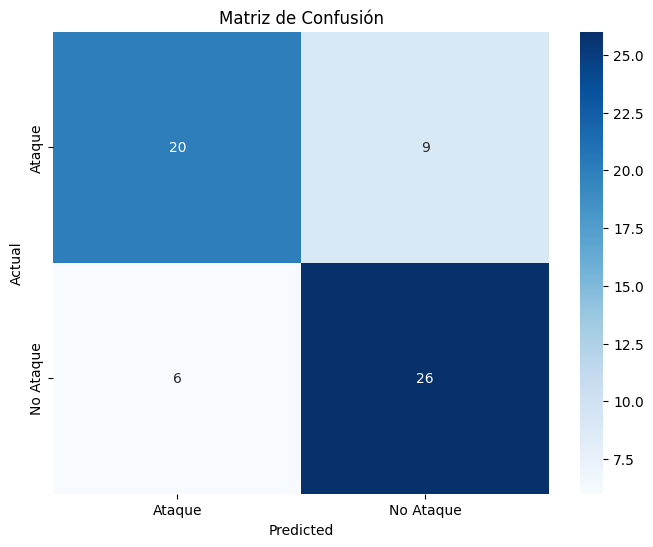

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_test_two, y_pred)

# Visualizar la matriz de confusión utilizando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ataque', 'No Ataque'], yticklabels=['Ataque','No Ataque'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()


here we obtained the first visual results

In [ ]:
# True Positive (TP): we predict a label of 1 (positive), and the true label is 1.

TP = np.sum(np.logical_and(y_pred == 1, y_test_two == 1))

# True Negative (TN): we predict a label of 0 (negative), and the true label is 0.
TN = np.sum(np.logical_and(y_pred == 0, y_test_two == 0))

# False Positive (FP): we predict a label of 1 (positive), but the true label is 0.
FP = np.sum(np.logical_and(y_pred == 1, y_test_two == 0))

# False Negative (FN): we predict a label of 0 (negative), but the true label is 1.
FN = np.sum(np.logical_and(y_pred == 0, y_test_two == 1))

print('True Positives are: %i, False Positives are: %i, True Negatives are: %i, and False Negatives are: %i' % (TP,FP,TN,FN))

True Positives are: 26, False Positives are: 9, True Negatives are: 20, and False Negatives are: 6


Evaluation metrics are used to measure model performance. Common metrics include precision, recall, f1-score and overall model accuracy.

These metrics can be calculated with two options:

* First cross_val_score from sklearn.model_selection

In [ ]:
from sklearn.model_selection import cross_val_score

# Evaluar el modelo
print("Classification Report:")
print(classification_report(y_test_two, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.69      0.73        29
           1       0.74      0.81      0.78        32

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61



We can observer the metrics calculate with the sklearn cross_val_score metrics and now we compare this results with the metrics calculate manually

***Secondly, by calculating the metrics manually***

*1. Recall is defined as TP / (TP + FN). As a result, the true positives are given by:*

In [ ]:
recall = TP / (TP + FN)
print('the recall is: %.2f' % recall)

the recall is: 0.81


A recall of 0.81 means that the model correctly identified 81% of all actual positive instances. In other words, when the model predicts that an individual is at risk of having a heart attack, it is correct approximately 81% of the time.

This metric is crucial in the context of heart attack prediction because it indicates how effectively the model can identify individuals who are truly at risk. A higher recall value suggests that the model is better at capturing individuals who are likely to experience a heart attack, which is essential for early intervention and preventive measures.  This adds to our objective in the model we have established in our business understanding.

*2. Now, precision is defined as TP / (TP + FP).  As a result, the false positives are given by:*

In [ ]:
precision = TP / (TP + FP)
print('the precision is: %.2f' % precision)

the precision is: 0.74


An accuracy of 0.74 means that the logistic regression model correctly identifies 74% of the positive instances (true positives) among all the instances it classified as positive (true positives plus false positives). In other words, accuracy is the proportion of instances correctly classified as positive (in this case, heart attack predictions) among all instances that the model classified as positive.

An accuracy of 0.74 is quite good and suggests that the model has a reasonable ability to correctly distinguish between instances of heart attacks and non-heart attacks. However, it is always important to keep in mind the specific context of the application and the consequences of false positives when interpreting the accuracy of a classification model

*3. Furthermore, the F1 score is also important. It is worked out as the harmonic mean of precision and recall according to this formula:*

  F1 = 2 * (precision * recall) / (precision + recall).

  The corresponding code is shown in the following cell:

In [ ]:
F1 = 2 * precision * recall / (precision + recall)
print('the F1 score is: %.2f' % F1)

the F1 score is: 0.78


The F1 score is a measure that combines precision and recall into a single metric. An F1 score of 0.78 indicates that the model has a good balance between accuracy and completeness.

The F1 score is especially useful when there is an imbalance between classes, such as in the case of heart attack prediction, where there may be more instances of one class than the other. In this context, the F1 score provides a more complete assessment of model performance than simply looking at accuracy or completeness separately.

*4. Now, there is an additional, very popular often used metric for a logistic regression model: accuracy.  It is pretty much the proportion of accurate predictions from the whole set of predictions and it includes both true positives and negatives.*

In [ ]:
accuracy = (TP + TN) / y_test.shape[0]
print('the accuracy score is: %.2f' % accuracy)

the accuracy score is: 0.75


The accuracy score is a measure that indicates the proportion of correct predictions made by the model out of the total number of instances in the test set. In this case, an accuracy score of 0.75 means that the model correctly classified approximately 75% of all instances in the test set.

These results do not meet the success criterion established in the business understanding, which stated that a model accuracy of at least 80% in predicting the probability of heart attacks should be achieved.

### ***5.2 Confution matrix with the characteristics $x^2$***

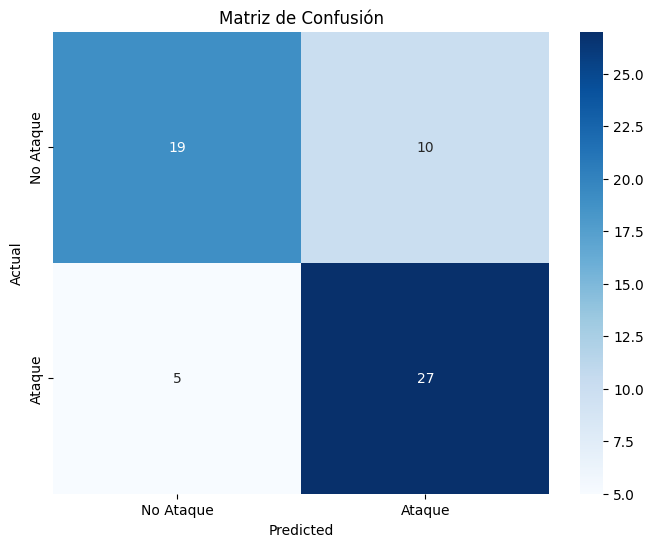

In [ ]:
# Crear y visualizar la matriz de confusión
conf_matrix = confusion_matrix(y_test_three, y_pred_three)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Ataque', 'Ataque'], yticklabels=['No Ataque', 'Ataque'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Evaluar el modelo
accuracy = accuracy_score(y_test_three, y_pred_three)
precision = precision_score(y_test_three, y_pred_three)
recall = recall_score(y_test_three, y_pred_three)
f1 = f1_score(y_test_three, y_pred_three)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.7540983606557377
Precision: 0.7297297297297297
Recall: 0.84375
F1 Score: 0.7826086956521738


* Interpretation

To compare the results of the new model that includes the quadratic variables with the previous model that did not include them, we analyzed the key metrics: Accuracy, Precision, Recall and F1 Score. Here are the comparisons:

1. **Accuracy**:
   - **Model with quadratic variables**: 0.754.
   - **Model without quadratic variables**: 0.75
   - **Interpretation**: The accuracy of the new model is slightly higher (0.754 vs. 0.75), although the difference is marginal.

2. **Precision**:
   - **Model with quadratic variables**: 0.730.
   - **Model without quadratic variables**: 0.74
   - **Interpretation**: The accuracy of the new model is slightly lower (0.730 vs. 0.74). This indicates that the new model has a slightly higher false positive rate compared to the previous model.

3. **Recall**:
   - **Model with quadratic variables**: 0.844.
   - **Model without quadratic variables**: 0.81
   - Interpretation**: The recall of the new model is better (0.844 vs. 0.81). This means that the new model has a better ability to correctly identify true positives, reducing false negatives.

4. **F1 Score**:
   - **Model with quadratic variables**: 0.783.
   - **Model without quadratic variables**: 0.78
   - **Interpretation**: The F1 Score of the new model is slightly higher (0.783 vs. 0.78), indicating a better balance between precision and recall in the new model.

In summary, the new model with quadratic features performs better in terms of recall and F1 Score, which is beneficial for the project's goal of accurately identifying individuals at high risk of heart attack. However, the slight decrease in accuracy should be considered and may require further adjustments, therefore it does not meet the success criterion of the model, therefore according to our business understanding the developed model should be rejected.


## ***6. Implementation***



#### **Business Decision:**

Although the new model with quadratic features presents improvements in recall and F1 Score, which are beneficial to the project objective of accurately identifying individuals at high risk of heart attack, the model success criterion (minimum accuracy of 80%) is not met. Therefore, **according to our business understanding, the developed model should be rejected**.

#### **Future Steps:**

1. **Re-evaluate and Refine the Model**: Consider hyperparameter tuning, inclusion of more features, or use of more advanced feature selection techniques.
2. **Consider Other Algorithms**: Explore other classification models such as Random Forest, Gradient Boosting, or Neural Networks.
3. **Extensive Validation**: Increase the robustness of cross-validation and consider validation on a completely separate data set.
4. **Continuous Monitoring and Updating**: Establish a process to monitor model performance in practice and update it periodically with new data.

#### **Conclusion:**

The analysis shows that while the improved model has merit, it does not fully meet the accuracy threshold required for implementation in a clinical setting. Continuing to refine and adjust the model is essential to achieve business objectives and ensure accurate and reliable decisions in heart attack prediction.

## **7. Adional notes**

In this project it has been decided not to use the “SMOTE” class imbalance handling to balance the classes in the training set. For two reasons, lack of understanding of balancing and because it is out of the course.

* ***IMPORTANT NOTE***


Thank you teacher. In the final part of the course I started to be much more interested in the course, it has served me as a solid foundation for future courses that I will see in artificial intelligence systems engineering (which are 4), and what we managed to develop machine learning serves me as a solid foundation for these courses, I made a lot of effort in this last partial following all the previous comments that I made in the previous partial, without losing the thread of understanding the business, following the logic of the crisp-dm cycle and interpreting results, I hope to get very good grades in this final section, in the theoretical partial I did very well I got 4.8, and now I have been very motivated with this subject and interested in a future monitoring of the subject. It would be my pleasure to be considered for this position if you do not already have someone in mind for this position.


Sincerely yours.




Geoffrey Pasaje Vidal